In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

df = pd.read_csv("../data/ch4_scores400.csv")
scores = np.array(df["score"])
df[:10]

,score
0,76
1,55
2,80
3,80
4,74
5,61
6,81
7,76
8,23
9,80


# 4.2 확률 모형
무작위추출은 임의로 표본을 선택하는 것이므로, 실행해볼 때까지는 어떤 결과가 나올지 알 수 없다. 어제 실행한 무작위추출과 오늘 실행한 무작위추출은 결과가 다르고, 그 결과로부터 내일의 결과를 알아맞힐 수도 없다.

이처럼 불확정성을 수반한 현상을 해석하기 위해 **확률**(probability)을 사용한다.
확률을 사용한 무작위추출 혹은 주사위를 모델링 한 것을 **확률 모형**(probability model)이라고 한다.

## 4.2.1 확률의 기본
주사위를 구릴 떄 어떤 숫자가 나올지 알아맞힐 수 없다. 그러나 주사위 눈이 숫자 1~6까지 임을 알고 있으며, 각각은 동일한 비율로 나온다는 것을 알고 있다.
이처럼 결과를 알아맞힐 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것을 **확률변수**(random variable)이라고 한다.

주사위를 굴릴 때까지 어떤 눈이 나올지 알 수 없지만, 주사위를 굴리면 눈은 하나씩 확정된다.
이와 같이 확률변수의 결과를 관측하는 것을 **시행**(trial)이라고 하고, 시행에 의해 관측되는 값을 **실현값**(realization)이라고 한다.
또한 '눈이 1'이나 '눈이 홀수'처럼 시행 결과로 나타날 수 있는 일을 **사건**(event)라고 한다.
특히 '눈이 1'처럼 더 세부적으로 분해할 수 없는 사건을 **근원사건**(elementary event)라고 한다.

주사위의 눈을 확률변수 X라고 하자. 이떄, '눈이 1'이 되는 사건의 확률이 1/6이라는 것은 다음과 같이 표현한다.
P(X=1) = 1/6

'눈이 홀수'라는 사건의 확률은 어떻게 표현할까?
P((X=1) U (X=3) U (X=5)) = 1/6 + 1/6 + 1/6 = 1/2

사건이 **상호배반**(mutually exclusive)이라는 것은 각 사건이 동시에 일어날 수 없다는 말이다. 예를 들어, '눈이 1 또는 2 또는 3'이라는 사건과 '눈이 6'이라는 사건은 동시에 일어날 수 없으므로 상호배뱐이다.
상호배반이 아닌 예는 '눈이 1 또는 2 또는 3'이라는 사건과 '눈이 짝수'라는 사건인 경우로, 이 경우 눈이 2가 나오면 양쪽 사건이 동시에 일어날 수 있다.

'눈이 홀수'라는 사건의 확률이 1/2이 되는 이유는, '눈이 1 또는 3 또는 5'는 상호배반이므로 각각의 확률을 더하여 구할 수 있기 때문이다.

## 4.2.2 확률분포(probability distribution)
확률분포란 확률변수가 어떻게 움직이는지를 나타낸 것이다. 전체 확률이 1인 확률변수가 취할 수 있는 값이 어떻게 분포하고 있는지 나타낸다고 할 수 있다.

사실 주사위의 눈이 가각 동일한 확률로 나오려면 무게중심이 정확하게 중심에 있어야 한다. 무게중심이 어긋나면 특정한 눈이 더 잘나오는 편향이 생긴다.
그런 불공정한 주사위가 있다고 가정해보자. 불공정하다는 것을 알지만, 각 눈이 어느 정도 확률로 나오는지는 알지 못한다. 이 주사위의 확률분포를 알 수 있을까?

In [3]:
# 확률변수에 필요한 변수가 취할 수 있는 값과 그 값이 나오는 확률을 정의해보자.
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21] # 불공정한 확률

In [4]:
np.random.choice(dice, p=prob) # 인수 p에 prob을 넘겨주는 것으로 각 확률을 지정할 수 있다.

5

In [26]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 3, 3, 3, 2, 5, 6, 5, 3, 2, 2, 6, 5, 6, 5, 3, 5, 5, 1, 6, 4, 3,
       4, 5, 4, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 4, 4, 6, 3, 1, 5, 3, 5, 6,
       6, 4, 5, 5, 4, 3, 4, 1, 6, 4, 5, 6, 3, 5, 5, 4, 6, 4, 3, 5, 3, 5,
       6, 4, 6, 6, 5, 2, 3, 4, 4, 6, 6, 2, 6, 4, 6, 5, 3, 2, 2, 3, 6, 6,
       4, 6, 1, 4, 2, 3, 3, 1, 4, 5, 3, 6])

In [27]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({"frequency": freq, "relative frequency": freq/num_trial}, index=pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,8,0.08
3,18,0.18
4,18,0.18
5,23,0.23
6,28,0.28


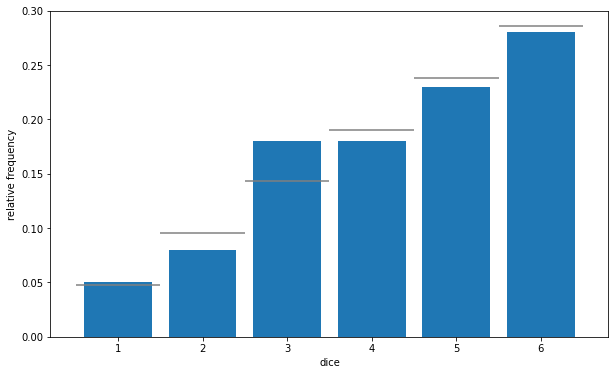

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors="gray")

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel("dice")
ax.set_ylabel("relative frequency")

plt.show()

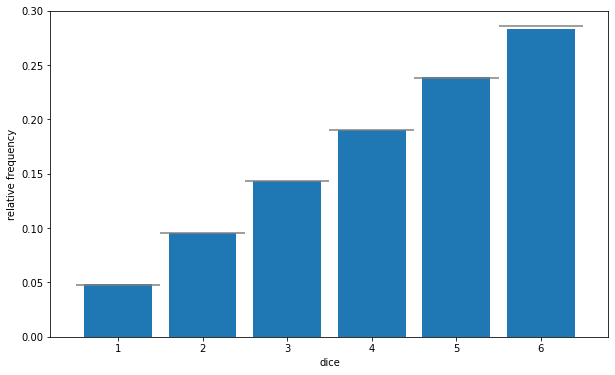

In [38]:
# 100번 시행은 추측된 확률분포와 실제 확률분포 사이에 상당한 차이가 있어 보이므로 100,000을 시행하고 살펴보자.
num_trial = 100000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors="gray")

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel("dice")
ax.set_ylabel("relative frequency")

plt.show()